In [1]:
#import libraries and modules
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests as requests
from WeatherKey import APIKEY
import json
import pandas as pd
import csv

In [2]:
#use random to generate a lat lon pair of 500 unique values
lat=[randint(-90,90) for val in range(1500)]
lon=[randint(-180,180) for val in range(1500)]

coordinates = random.sample(list(zip(lat, lon)), 1500)

cities = []
for coordinate_pair in coordinates:
   lat, lon = coordinate_pair
   cities.append(citipy.nearest_city(lat, lon))

names_list = []
for city in cities:
    country_code = city.country_code
    names_list.append(city.city_name)

unique_cities_set = set(names_list)
unique_cities_list = list(unique_cities_set)
unique_cities_list = unique_cities_list[:500]

In [3]:
#build full URL with city as variable inputted from for loop, obtain weather data for cities in unique city list and return data 
#in imperial units (i.e. Fahrenheit)
url = "http://api.openweathermap.org/data/2.5/weather?q="
city_count = 0

temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
lat_list = []
city_list = []

#for loop fun to loop through cities
for city in unique_cities_list:
    query_url = url + city + "&units=imperial" + "&APPID=" + APIKEY
    weather_response = requests.get(query_url)
    if weather_response.status_code == 200:
        weather_data = weather_response.json()
        city_count += 1
        city_name = weather_data["name"]
        
        #Print previews:
        #print(json.dumps(weather_data,indent =4,sort_keys =True))
        #print("city ID: " + str(city_count) + "," + " name: " + weather_data["name"])
        
        #identify relevant datapoints
        temp = weather_data["main"]["temp"]
        humidity = weather_data["main"]["humidity"]
        cloudiness = weather_data["clouds"]["all"]
        wind_speed = weather_data["wind"]["speed"]
        lat = weather_data["coord"]["lat"]
        
        #append relevant datapoints for each city in for loop into respective lists
        city_list.append(city_name)
        temp_list.append(temp)
        humidity_list.append(humidity)
        cloudiness_list.append(cloudiness)
        wind_speed_list.append(wind_speed)
        lat_list.append(lat)

#create dictionary to pass into df function
complete_weather_details = {"Temperature": temp_list, "Humidity": humidity_list, "Cloudiness": cloudiness_list,"Wind Speed": wind_speed_list,"Latitude": lat_list,"City Name": city_list}
complete_weather_data = pd.DataFrame(complete_weather_details)
        
complete_weather_data.head()
complete_weather_data.to_csv("weather.csv")
        

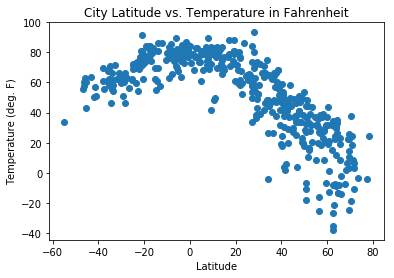

In [8]:
plt.title("City Latitude vs. Temperature in Fahrenheit")
plt.xlabel("Latitude")
plt.ylabel("Temperature (deg. F)")
plt.scatter(complete_weather_data["Latitude"], complete_weather_data["Temperature"], marker = "o")
plt.savefig("LatvsTemp.png")
plt.show()

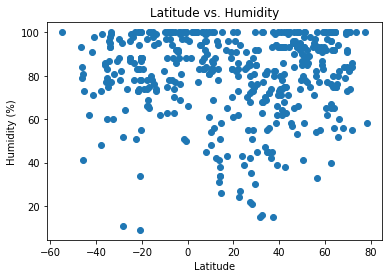

In [9]:
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(complete_weather_data["Latitude"], complete_weather_data["Humidity"], marker = "o")
plt.savefig("LatvsHumid.png")
plt.show()

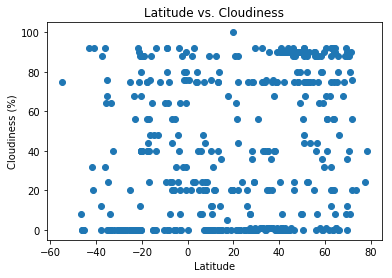

In [11]:
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(complete_weather_data["Latitude"], complete_weather_data["Cloudiness"], marker = "o")
plt.savefig("LatvsCloud.png")
plt.show()

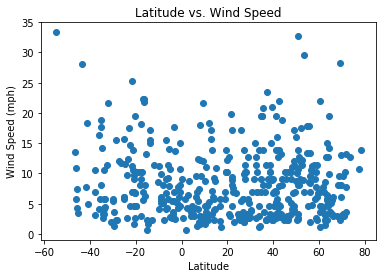

In [10]:
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(complete_weather_data["Latitude"], complete_weather_data["Wind Speed"], marker = "o")
plt.savefig("LatvsWind.png")
plt.show()